In [1]:
# --- Penjelasan Komentar ---
# Pustaka untuk membuat dan mengelola struktur graf. Ini adalah inti dari program kita.
import networkx as nx

# Pustaka untuk menghasilkan angka acak, digunakan untuk membuat graf dan bobotnya.
import random

# Pustaka untuk mengukur waktu eksekusi dengan presisi tinggi.
import time

# Pustaka untuk mengelola dan menampilkan data dalam bentuk tabel (DataFrame). Sangat berguna untuk menyajikan hasil.
import pandas as pd

# Pustaka utama untuk membuat plot atau diagram/grafik.
import matplotlib.pyplot as plt

# Pustaka yang dibangun di atas matplotlib untuk membuat visualisasi data yang lebih menarik dan mudah.
import seaborn as sns

# Memberikan instruksi agar plot ditampilkan langsung di bawah sel notebook.
%matplotlib inline

print("Semua pustaka berhasil diimpor!")


Semua pustaka berhasil diimpor!


In [2]:
# --- Penjelasan Komentar ---
# Mendefinisikan fungsi untuk membuat graf sesuai parameter yang kita inginkan.
def create_random_graph(v_nodes, density):
    """
    Fungsi ini membuat sebuah graf terarah berbobot (directed weighted graph) secara acak
    berdasarkan jumlah simpul (v_nodes) dan kepadatan (density) yang ditentukan.
    """
    # 1. Membuat objek graf terarah kosong menggunakan networkx.
    graph = nx.DiGraph()
    
    # 2. Menambahkan semua simpul ke dalam graf. Simpul diberi nama 0, 1, 2, ..., v_nodes-1.
    graph.add_nodes_from(range(v_nodes))
    
    # 3. Menghitung jumlah sisi maksimum yang mungkin ada pada graf terarah.
    max_edges = v_nodes * (v_nodes - 1)
    
    # 4. Menghitung jumlah sisi target yang harus dibuat berdasarkan parameter kepadatan.
    num_edges = int(density * max_edges)
    
    # 5. Memulai loop untuk menambahkan sisi satu per satu sampai jumlah target tercapai.
    while graph.number_of_edges() < num_edges:
        # a. Memilih 2 simpul unik secara acak sebagai kandidat awal dan akhir dari sisi.
        u, v_node = random.sample(range(v_nodes), 2)
        
        # b. Memeriksa apakah sisi antara kedua simpul tersebut belum ada.
        #    Ini untuk mencegah penambahan sisi duplikat.
        if not graph.has_edge(u, v_node):
            # c. Jika belum ada, tentukan bobot acak untuk sisi ini (antara 1 sampai 100).
            weight = random.randint(1, 100)
            
            # d. Tambahkan sisi (u -> v_node) ke dalam graf beserta bobotnya.
            graph.add_edge(u, v_node, weight=weight)
            
    # 6. Setelah loop selesai, kembalikan objek graf yang sudah jadi.
    return graph

# Mari kita coba fungsi ini untuk membuat satu graf kecil sebagai contoh
contoh_graf = create_random_graph(v_nodes=10, density=0.3)
print(f"Graf contoh berhasil dibuat dengan {contoh_graf.number_of_nodes()} simpul dan {contoh_graf.number_of_edges()} sisi.")


Graf contoh berhasil dibuat dengan 10 simpul dan 27 sisi.


In [4]:
# --- Penjelasan Komentar ---
# 1. Menetapkan parameter-parameter utama untuk eksperimen sesuai Bab 3.
VERTICES = [50, 150, 300]         # Variasi jumlah simpul
DENSITIES = [0.2, 0.5, 0.8]        # Variasi kepadatan graf
RUNS = 10                          # Jumlah pengulangan per skenario

# 2. Menyiapkan sebuah list kosong untuk menampung semua hasil eksperimen.
results = []

# 3. Memulai loop luar: iterasi untuk setiap nilai Ukuran Graf (V).
for v in VERTICES:
    # 4. Memulai loop tengah: iterasi untuk setiap nilai Kepadatan (d).
    for d in DENSITIES:
        # Menampilkan pesan status agar kita tahu progresnya.
        print(f"Menguji skenario: V={v}, d={d}...")
        
        # 5. Menyiapkan list sementara untuk menyimpan waktu dari 10 pengulangan.
        dijkstra_times = []
        bellman_times = []
        
        # 6. Memulai loop dalam: iterasi pengulangan sebanyak RUNS (10 kali).
        for i in range(RUNS):
            # a. Membuat graf baru yang acak untuk setiap pengulangan.
            graph = create_random_graph(v, d)
            # b. Menetapkan simpul awal (source) selalu 0.
            source_node = 0

            # c. Mengukur waktu eksekusi untuk algoritma Dijkstra.
            start_time_dijkstra = time.perf_counter()
            # =================== BARIS YANG DIPERBAIKI ===================
            nx.single_source_dijkstra_path_length(graph, source=source_node, weight='weight')
            # =============================================================
            end_time_dijkstra = time.perf_counter()
            # Menambahkan waktu (dalam milidetik) ke list sementara.
            dijkstra_times.append((end_time_dijkstra - start_time_dijkstra) * 1000)

            # d. Mengukur waktu eksekusi untuk algoritma Bellman-Ford.
            start_time_bellman = time.perf_counter()
            # =================== BARIS YANG DIPERBAIKI ===================
            nx.single_source_bellman_ford_path_length(graph, source=source_node, weight='weight')
            # =============================================================
            end_time_bellman = time.perf_counter()
            # Menambahkan waktu (dalam milidetik) ke list sementara.
            bellman_times.append((end_time_bellman - start_time_bellman) * 1000)

        # 7. Setelah 10 pengulangan selesai, hitung waktu rata-ratanya.
        avg_dijkstra = sum(dijkstra_times) / RUNS
        avg_bellman = sum(bellman_times) / RUNS
        
        # 8. Menyimpan hasil rata-rata ke dalam list utama 'results'.
        results.append({
            'Ukuran Graf (V)': v,
            'Kepadatan (d)': d,
            'Waktu Rata-rata Dijkstra (ms)': avg_dijkstra,
            'Waktu Rata-rata Bell-Ford (ms)': avg_bellman
        })

print("\nEksperimen Selesai!")


Menguji skenario: V=50, d=0.2...
Menguji skenario: V=50, d=0.5...
Menguji skenario: V=50, d=0.8...
Menguji skenario: V=150, d=0.2...
Menguji skenario: V=150, d=0.5...
Menguji skenario: V=150, d=0.8...
Menguji skenario: V=300, d=0.2...
Menguji skenario: V=300, d=0.5...
Menguji skenario: V=300, d=0.8...

Eksperimen Selesai!


In [5]:
# --- Penjelasan Komentar ---
# 1. Mengubah list berisi hasil (results) menjadi sebuah objek DataFrame pandas.
df_results = pd.DataFrame(results)

# 2. (Opsional) Memberikan format pada angka agar lebih mudah dibaca, misalnya 2 angka di belakang koma.
formatted_df = df_results.style.format({
    'Waktu Rata-rata Dijkstra (ms)': '{:.2f}',
    'Waktu Rata-rata Bell-Ford (ms)': '{:.2f}'
}).set_caption("Tabel 5. Hasil Waktu Eksekusi Rata-rata (dalam milidetik)")

# 3. Menampilkan tabel yang sudah diformat di output notebook.
display(formatted_df)


,Ukuran Graf (V),Kepadatan (d),Waktu Rata-rata Dijkstra (ms),Waktu Rata-rata Bell-Ford (ms)
0,50,0.200000,0.41,0.45
1,50,0.500000,0.42,0.70
2,50,0.800000,0.95,1.16
3,150,0.200000,1.98,2.30
4,150,0.500000,3.90,5.43
5,150,0.800000,6.86,10.09
6,300,0.200000,9.52,17.00
7,300,0.500000,24.58,46.50
8,300,0.800000,31.78,56.15


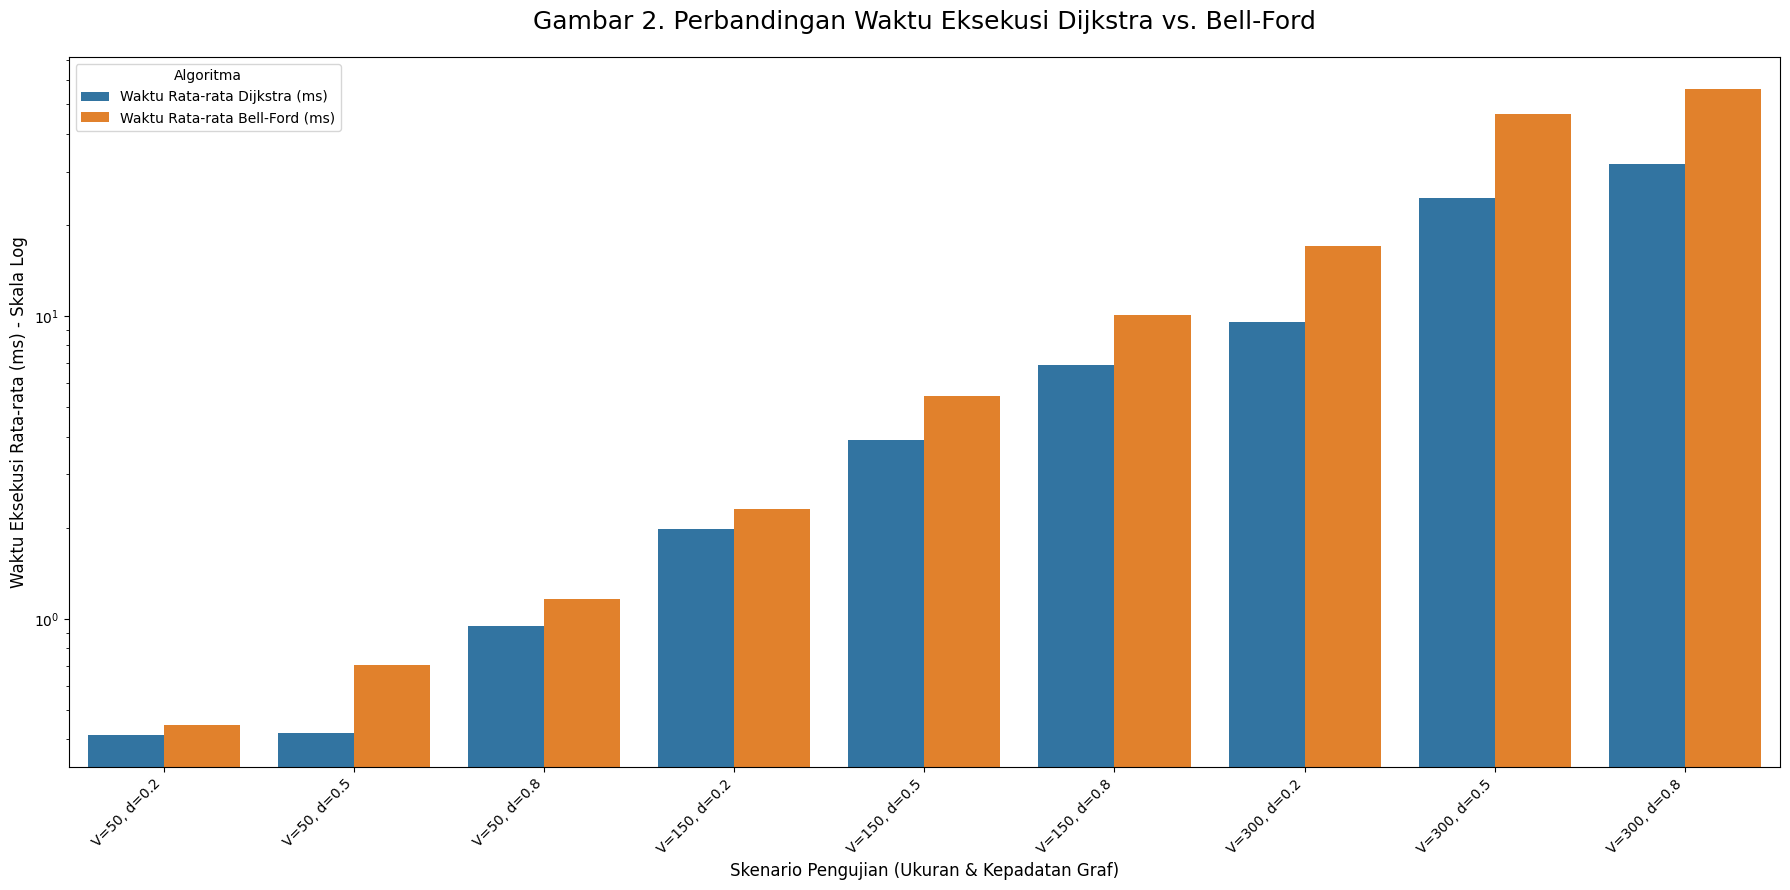

In [6]:
# --- Penjelasan Komentar ---
# 1. Menyiapkan 'kanvas' atau area untuk menggambar plot, dengan ukuran yang lebih besar agar mudah dilihat.
plt.figure(figsize=(18, 9))

# 2. Mengubah struktur data dari 'lebar' menjadi 'panjang' (melting).
#    Ini adalah langkah persiapan agar seaborn dapat dengan mudah membuat grup batang.
#    Setiap baris akan menjadi: Skenario, Nama Algoritma, Nilai Waktu.
df_melted = df_results.melt(id_vars=['Ukuran Graf (V)', 'Kepadatan (d)'], 
                            value_vars=['Waktu Rata-rata Dijkstra (ms)', 'Waktu Rata-rata Bell-Ford (ms)'],
                            var_name='Algoritma', 
                            value_name='Waktu Eksekusi (ms)')

# 3. Membuat kolom baru 'Skenario' untuk label sumbu-x agar lebih deskriptif.
df_melted['Skenario'] = df_melted.apply(lambda row: f"V={row['Ukuran Graf (V)']}, d={row['Kepadatan (d)']}", axis=1)

# 4. Menggunakan seaborn untuk membuat diagram batang (barplot).
#    x: Sumbu-x akan diisi oleh Skenario.
#    y: Sumbu-y akan diisi oleh Waktu Eksekusi.
#    hue: Digunakan untuk membedakan warna batang berdasarkan nama 'Algoritma'.
sns.barplot(x='Skenario', y='Waktu Eksekusi (ms)', hue='Algoritma', data=df_melted)

# 5. Mengubah skala sumbu-y menjadi logaritmik.
#    Ini SANGAT PENTING karena perbedaan waktu antara Dijkstra dan Bell-Ford sangat besar.
#    Tanpa skala log, batang Dijkstra akan terlihat sangat kecil dan sulit dibandingkan.
plt.yscale('log')

# 6. Menambahkan judul dan label pada diagram agar informatif.
plt.title('Gambar 2. Perbandingan Waktu Eksekusi Dijkstra vs. Bell-Ford', fontsize=18, pad=20)
plt.xlabel('Skenario Pengujian (Ukuran & Kepadatan Graf)', fontsize=12)
plt.ylabel('Waktu Eksekusi Rata-rata (ms) - Skala Log', fontsize=12)
plt.xticks(rotation=45, ha='right') # Memutar label sumbu-x agar tidak tumpang tindih.

# 7. Menampilkan legenda (keterangan warna).
plt.legend(title='Algoritma')

# 8. Merapikan layout plot.
plt.tight_layout()

# 9. Menampilkan plot.
plt.show()


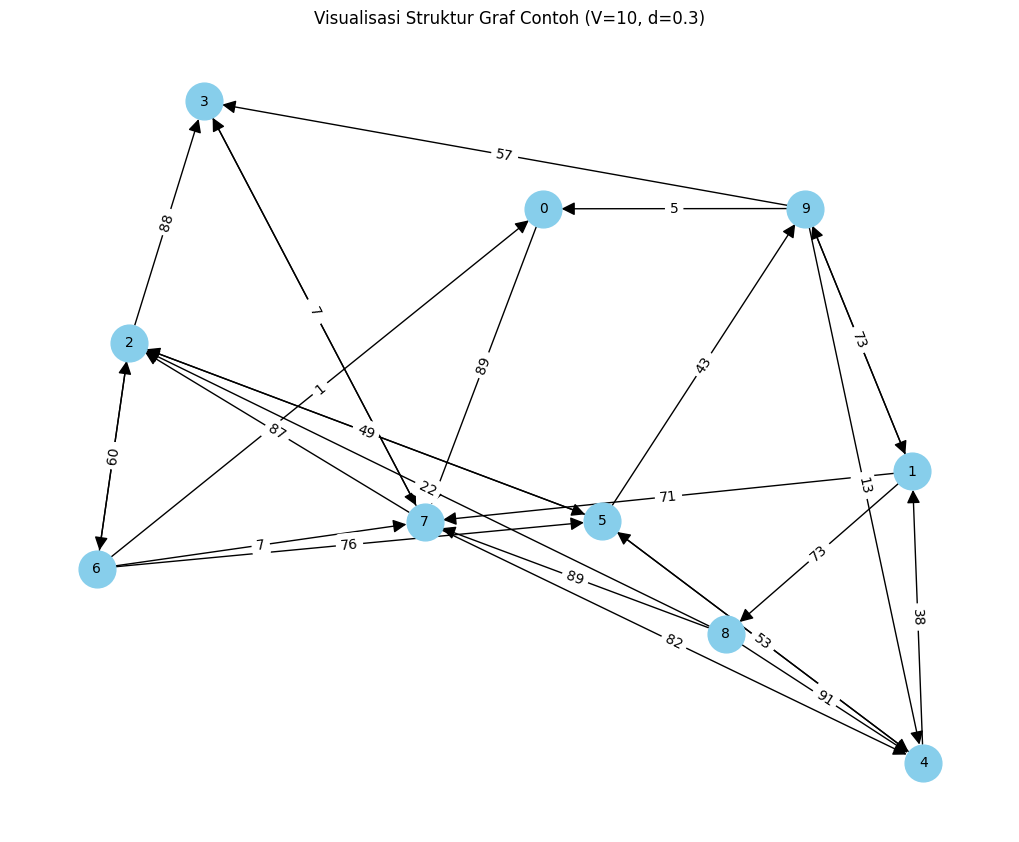

In [7]:
# --- Penjelasan Komentar ---
# Langkah ini bersifat opsional untuk melihat bentuk dari sebuah graf kecil.
# Kita akan menggunakan 'contoh_graf' yang sudah kita buat di Sel 2 (V=10, d=0.3).

# 1. Menyiapkan 'kanvas' untuk menggambar.
plt.figure(figsize=(10, 8))

# 2. Menentukan posisi atau layout dari setiap simpul agar tidak berantakan.
#    'spring_layout' adalah salah satu layout yang populer, ia memposisikan simpul
#    seolah-olah terhubung oleh pegas, sehingga yang terhubung cenderung lebih dekat.
pos = nx.spring_layout(contoh_graf, seed=42) # seed untuk hasil yang bisa direplikasi

# 3. Menggambar jaringan graf.
#    - contoh_graf: Objek graf yang mau digambar.
#    - pos: Posisi simpul yang sudah kita tentukan.
#    - with_labels=True: Menampilkan nomor pada setiap simpul.
#    - node_color: Warna simpul.
#    - node_size: Ukuran simpul.
#    - font_size: Ukuran font label simpul.
#    - arrowsize: Ukuran panah pada sisi (karena ini graf terarah).
nx.draw(contoh_graf, pos, with_labels=True, node_color='skyblue', node_size=700, font_size=10, arrowsize=20)

# 4. (Opsional) Mengambil bobot dari setiap sisi untuk ditampilkan sebagai label.
edge_labels = nx.get_edge_attributes(contoh_graf, 'weight')

# 5. Menggambar label bobot pada setiap sisi.
nx.draw_networkx_edge_labels(contoh_graf, pos, edge_labels=edge_labels)

# 6. Menambahkan judul pada visualisasi.
plt.title("Visualisasi Struktur Graf Contoh (V=10, d=0.3)")

# 7. Menampilkan hasil gambar.
plt.show()

